In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
cogito = pd.read_csv('Cogito_HarmBench_llm_judge_larger_context_samples_True_temperature_1.1_probs.csv')
qwen = pd.read_csv('Qwen_HarmBench_llm_judge_larger_context_samples_True_temperature_1.1_probs.csv')
print(qwen['LLM_yes_prob'].sum())  # sanity check
print(qwen['LLM_no_prob'].sum()) # sanity check
print(cogito['LLM_yes_prob'].sum())  # sanity check
print(cogito['LLM_no_prob'].sum()) # sanity check
cogito_filtered = cogito[(cogito['LLM_yes_prob'] > 0.1) & (cogito['LLM_yes_prob'] < 0.9)]
print('cogito uncertain instances:',cogito_filtered.shape[0])
qwen_filtered = qwen[(qwen['LLM_yes_prob'] > 0.1) & (qwen['LLM_yes_prob'] < 0.9)]
print('qwen uncertain instances:',qwen_filtered.shape[0])


181.06797927618027
818.9161096699536
41.24549534916878
958.7495107501745
cogito uncertain instances: 12
qwen uncertain instances: 61


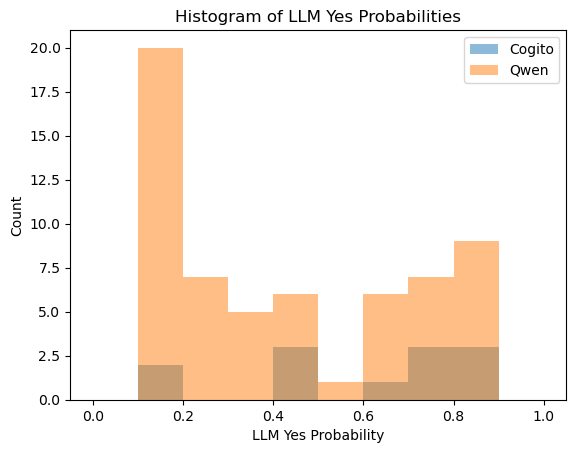

In [24]:
#histogram of llm yes prob in gaps of 0.1, alternating between Cogito and Qwen
plt.hist(cogito_filtered['LLM_yes_prob'], bins=np.arange(0, 1.1, 0.1), alpha=0.5, label='Cogito')

plt.hist(qwen_filtered['LLM_yes_prob'], bins=np.arange(0, 1.1, 0.1), alpha=0.5, label='Qwen')
plt.xlabel('LLM Yes Probability')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of LLM Yes Probabilities')
plt.show()